In [177]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import linear_model
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [178]:
grass_base=pd.read_csv('../input/glass/glass.csv')
#grass_base=grass_base.dropna()
grass_base.info() #feature output

In [179]:
#Missing data visualization
msno.bar(grass_base, color = 'b', labels = True)

In [180]:
grass_base.head()

In [181]:
grass_base.describe()

In [182]:
grass_base.hist(bins=50, figsize=(20,10))
plt.show()

In [183]:
fig = plt.figure(figsize=(13,13))
sns.heatmap(data=grass_base.corr(),annot=True)

In [184]:
grass_base['Type'].unique()

In [185]:
fig = plt.figure(figsize=(14,5))
sns.countplot(grass_base['Type'])

In [186]:
feature_names = ['Al', 'Na', 'Mg', 'RI', 'Si', 'K', 'Ca', 'Ba']
sns.pairplot(grass_base, hue="Type", palette = 'Set1', vars=feature_names)

In [187]:
#Box plot
for i in range(len(feature_names)):
    fig=plt.figure(figsize=(20,20))
    ax = sns.boxplot(y=feature_names[i], x='Type', data=grass_base)

In [188]:
from sklearn.model_selection import train_test_split
X = grass_base.drop('Type',axis=1)
Xx = X.drop(['Fe', 'Ba'],axis=1)
Y = grass_base['Type']
X_train, X_test, Y_train, Y_test = train_test_split(Xx, Y, test_size=0.40, random_state=102)
# Feng Shui 
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

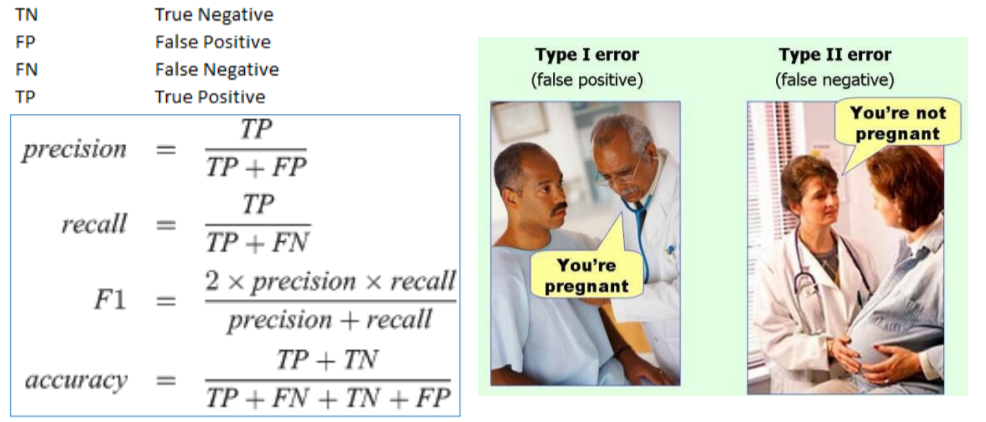

In [189]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model=KNeighborsClassifier(n_neighbors=5)
kNN_model_res = kNN_model.fit(X_train,Y_train)
Y_pred = kNN_model_res.predict(X_test)
print('Accuracy (train): ', kNN_model_res.score(X_train, Y_train))
print('Accuracy (test) : ', kNN_model_res.score(X_test, Y_test))
# We can visualize this
from sklearn.metrics import plot_confusion_matrix, classification_report
print(classification_report(Y_test, Y_pred))
plot_confusion_matrix(kNN_model_res, X_test, Y_test, cmap = plt.cm.PuRd)

In [190]:
error_rate = []

for i in range(1,40):
    kNN_model = KNeighborsClassifier(n_neighbors=i)
    kNN_model.fit(X_train,Y_train)
    pred_i = kNN_model.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

In [191]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [192]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model=KNeighborsClassifier(n_neighbors=2)
kNN_model_res = kNN_model.fit(X_train,Y_train)
Y_pred = kNN_model_res.predict(X_test)
print('Accuracy (train): ', kNN_model_res.score(X_train, Y_train))
print('Accuracy (test) : ', kNN_model_res.score(X_test, Y_test))
# We can visualize this
from sklearn.metrics import plot_confusion_matrix, classification_report
print(classification_report(Y_test, Y_pred))
plot_confusion_matrix(kNN_model_res, X_test, Y_test, cmap = plt.cm.PuRd)

In [193]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# random_state = 0, I fix the initial value because otherwise there will be different accuracy every run 
# and it is impossible to analyze anything
DTClassifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, splitter = 'random', min_samples_split = 2, random_state = 102).fit(X_train, Y_train) # create Decision Tree classifier
Y_pred = DTClassifier.predict(X_test)
print('Accuracy (train): ', DTClassifier.score(X_train, Y_train))
print('Accuracy (test) : ', DTClassifier.score(X_test, Y_test))
# We can visualize this
plot_confusion_matrix(DTClassifier, X_test, Y_test, cmap = plt.cm.PuRd)

In [194]:
plt.figure(figsize = (20, 20))
plot_tree(DTClassifier, feature_names = ['Al', 'Na', 'Mg', 'RI', 'Si', 'K', 'Ca'], 
          class_names = ['1', '2', '3', '5', '6', '7'], max_depth = 2, filled = True)
plt.show()

In [229]:
from sklearn.svm import SVC
SVC_model = SVC(C=1, gamma = 1.0, kernel = 'rbf', random_state = 3)
SVC_model.fit(X_train,Y_train)
Y_pred = SVC_model.predict(X_test)
print('Accuracy (train): ', SVC_model.score(X_train, Y_train))
print('Accuracy (test) : ', SVC_model.score(X_test, Y_test))
# We can visualize this
plot_confusion_matrix(SVC_model, X_test, Y_test, cmap = plt.cm.PuRd)

In [230]:
from sklearn.model_selection import GridSearchCV
param_grid_scv = {'C': [0.1, 1, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid_scv, refit=True)
grid.fit(X_train,Y_train)

In [231]:
grid.best_params_

In [232]:
grid.best_estimator_

In [233]:
Y_pred = grid.predict(X_test)
print('Accuracy (train): ', grid.score(X_train, Y_train))
print('Accuracy (test) : ', grid.score(X_test, Y_test))
print(classification_report(Y_test,Y_pred))
# We can visualize this
plot_confusion_matrix(SVC_model, X_test, Y_test, cmap = plt.cm.PuRd)

In [200]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 7).fit(X_train, Y_train)
Y_pred = RFClassifier.predict(X_test)
print('Accuracy (train): ', RFClassifier.score(X_train, Y_train))
print('Accuracy (test) : ', RFClassifier.score(X_test, Y_test))
print(classification_report(Y_test,Y_pred))
# We can visualize this
plot_confusion_matrix(RFClassifier, X_test, Y_test, cmap = plt.cm.PuRd)

In [223]:
param_grid_RF = {'n_estimators' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 70, 100], 'criterion' : ['gini', 'entropy']}
grid = GridSearchCV(RandomForestClassifier(), param_grid_RF, refit=True)
grid.fit(X_train,Y_train)

In [224]:
grid.best_params_

In [227]:
Y_pred = grid.predict(X_test)
print('Accuracy (train): ', grid.score(X_train, Y_train))
print('Accuracy (test) : ', grid.score(X_test, Y_test))
# We can visualize this
plot_confusion_matrix(RandomForestClassifier(), X_test, Y_test, cmap = plt.cm.PuRd)

In [238]:
from sklearn.ensemble import AdaBoostClassifier
Ada_lassifier = AdaBoostClassifier(n_estimators = 10, algorithm = 'SAMME', random_state = 43).fit(X_train, Y_train)
Y_pred = Ada_lassifier.predict(X_test)
print('Accuracy (train): ', Ada_lassifier.score(X_train, Y_train))
print('Accuracy (test) : ', Ada_lassifier.score(X_test, Y_test))
# We can visualize this
plot_confusion_matrix(Ada_lassifier, X_test, Y_test, cmap = plt.cm.PuRd)

In [243]:
param_grid_Ada = {'n_estimators' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 70, 80, 100, 200], 'algorithm' : ['SAMME', 'SAMME.R']}
grid = GridSearchCV(AdaBoostClassifier(), param_grid_Ada, refit=True)
grid.fit(X_train,Y_train)

In [244]:
grid.best_params_

In [245]:
Y_pred = grid.predict(X_test)
print('Accuracy (train): ', grid.score(X_train, Y_train))
print('Accuracy (test) : ', grid.score(X_test, Y_test))
# We can visualize this
plot_confusion_matrix(Ada_lassifier, X_test, Y_test, cmap = plt.cm.PuRd)